In [71]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sys import stdout
import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle
from collections import defaultdict

In [30]:
def build_matrix_to_tsne(emb_dict, tokens):
    matrix = []
    for token in tokens:
        matrix.append(emb_dict[token])
    return matrix

def check_similarity(emb_matrix, word):
    return cosine_similarity(word.reshape(1, -1), emb_matrix)

In [114]:
embeddings = pickle.load(open("../model/embeddings/cbow_0.embedding", "rb"))
words = ["man", "women", "king", "queen", "son", 'bad', 'worst', 'big', 'do', 'good', 'go']
emb_matrix = list(embeddings.values())
idx2word = defaultdict(lambda: "NA")
for k in embeddings.keys():
    idx2word[len(idx2word)] = k
model = TSNE(n_components=2, random_state=0)

In [115]:
labels = []
to_plot = []

for i, word in enumerate(words):
    try:
        cosine_matrix = check_similarity(emb_matrix, embeddings[word])
        ind = cosine_matrix[0].argsort()[-4:][::-1]
        closest = ind.tolist()
        tokens = [idx2word[idx] for idx in closest]
        to_reduce = build_matrix_to_tsne(embeddings, tokens)
        labels += [token for token in tokens]
        to_plot += [x_y for x_y in to_reduce]
    except:
        print('Word not found -', word)
        del words[i]

/home/devildev/.local/share/miniconda3/envs/torch/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/devildev/.local/share/miniconda3/envs/torch/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


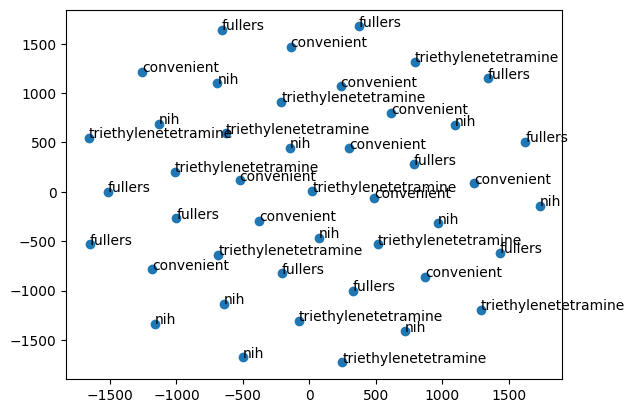

In [116]:
X_hdim = np.array(to_plot)
X = model.fit_transform(X_hdim)
plt.scatter(X[:, 0], X[:, 1])
for i, l in enumerate(labels):
    plt.annotate(l, (X[i, 0], X[i, 1]))
plt.show()